In [150]:
import pandas as pd
import numpy as np
import cvxpy as cp

##for print image
import matplotlib.pyplot as plt


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


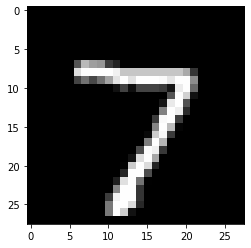

In [151]:
#Read the csv file 
Train_data = pd.read_csv("mnist_train.csv",header=0)
Test_data = pd.read_csv("mnist_test.csv",header=0)
Train_label = Train_data.iloc[:,0].values
Test_label = Test_data.iloc[:,0].values
Train_data = Train_data.iloc[:,1:].values
Test_data = Test_data.iloc[:,1:].values

print(Test_data)
#test to print a image 
img = Test_data[0].reshape(28,28)
plt.imshow(img, 'gray')
plt.show()

In [152]:
#Use the classifer
IMG_COL = 28
IMG_ROW = 28 

#Extract 2 digit from data set and lable set 
#Return numpy 2d arr for data and 1d arr for label  
def extract_two_digit(digit1,digit2,data,label):
    m_data = []
    m_lable = []
    #Extrac the digit1 and digit 2 
    for i in range(0, len(label)):
        if label[i] == digit1:
            #print(Train_data[i,:])
            m_lable.append(digit1)
            m_data.append(data[i])
        elif label[i]==digit2:
            m_lable.append(digit2)
            m_data.append(data[i])

    return np.array(m_data), np.array(m_lable)

#print the bit map (for testing)
#img: 28*28 length vector 
def printImg(img):
    img = img.reshape(28,28)
    plt.imshow(img, 'gray')
    plt.show()


In [153]:
class MyClassifier:
    def __init__(self,K,M):
        self.K = K  #Number of classes
        self.M = M  #Number of features
        self.W = []
        self.w = []
        
    def train(self, p, train_data, train_label):
        
        # THIS IS WHERE YOU SHOULD WRITE YOUR TRAINING FUNCTION
        #
        # The inputs to this function are:
        #
        # self: a reference to the classifier object.
        # train_data: a matrix of dimesions N_train x M, where N_train
        # is the number of inputs used for training. Each row is an
        # input vector.
        # trainLabel: a vector of length N_train. Each element is the
        # label for the corresponding input column vector in trainData.
        #
        # Make sure that your code sets the classifier parameters after
        # training. For example, your code should include a line that
        # looks like "self.W = a" and "self.w = b" for some variables "a"
        # and "b".
        

        #################################Start####################################
        # The code does not check for tain label, so make sure the input data only 
        # contain 2 classes, otherwise the output biased classifier, which is bad. 
        #!!!The first set in the train set represent +1 in the classifier. 
        a = cp.Variable(self.M)
        b = cp.Variable(1)
        #the size of z is the count of the set of train_data 
        z = cp.Variable(len(train_label))

        #constrains
        constraints = []  
        label_1 = train_label[0]
        for i in range(0, len(train_label)):
            #check the length of the train data 
            assert True==(len(train_data[i])==self.M)
            s=1 
            if(train_label[i]!=label_1):
                s = -1 
            constraints += [
                z[i]>=0,
                (1-s*(a.T@train_data[i]+b))<=z[i]
            ]
        prob = cp.Problem(cp.Minimize(sum(z)),constraints)
        prob.solve() 
        self.W = a.value  
        self.w = b.value 
        print(self.W)
        

    
            
        
    def f(self,input):
        # THIS IS WHERE YOU SHOULD WRITE YOUR CLASSIFICATION FUNCTION
        #
        # The inputs of this function are:
        #
        # input: the input to the function f(*), equal to g(y) = W^T y + w
        #
        # The outputs of this function are:
        #
        # s: this should be a scalar equal to the class estimated from
        # the corresponding input data point, equal to f(W^T y + w)
        # You should also check if the classifier is trained i.e. self.W and
        # self.w are nonempty


        #################################Start####################################
        #Output: output 1 if the input is classified to be the first set in the 
        # train data set!!!!
        #assert True==(self.W == None or self.w == None), "self.W or self.w equal None!!!"
        #assert True==(len(self.W) == len(input)), "The input length doest not match the classifier!!!"

        if (self.W.T@input + self.w >= 0):
            return 1
        else:
            return -1 
      
        
    def classify(self,test_data):
        # THIS FUNCTION OUTPUTS ESTIMATED CLASSES FOR A DATA MATRIX
        # 
        # The inputs of this function are:
        # self: a reference to the classifier object.
        # test_data: a matrix of dimesions N_test x M, where N_test
        # is the number of inputs used for training. Each row is an
        # input vector.
        #
        #
        # The outputs of this function are:
        #
        # test_results: this should be a vector of length N_test,
        # containing the estimations of the classes of all the N_test
        # inputs.
        
        print() #you can erase this line
    
    
    def TestCorrupted(self,p,test_data):
        # THIS FUNCTION OUTPUTS ESTIMATED CLASSES FOR A DATA MATRIX
        #
        #
        # The inputs of this function are:
        #
        # self: a reference to the classifier object.
        # test_data: a matrix of dimesions N_test x M, where N_test
        # is the number of inputs used for training. Each row is an
        # input vector.
        #
        # p:erasure probability
        #
        #
        # The outputs of this function are:
        #
        # test_results: this should be a vector of length N_test,
        # containing the estimations of the classes of all the N_test
        # inputs.
        
        print() #you can erase this line


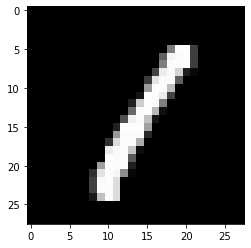

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [154]:
#Test the classifier 
classifier = MyClassifier(2, IMG_COL*IMG_ROW)

#classifier.f(Train_data)

"""
Train_data_17,Train_label_17 = extract_two_digit(1,7,Train_data,Train_lable)
print(Train_data_17)
a = cp.Variable(IMG_COL*IMG_ROW)
b = cp.Variable(1)
#the size of z is the count of the set of train_data 
z = cp.Variable(len(Train_label_17))

printImg(Train_data_17[0])

#constrains\
constraints = []  
for i in range(0, len(Train_label_17)):
    #print("length of train data: ", len(Train_data_17[i]))
    s=1 
    if(Train_label_17[i]==7):
        s = -1 
    constraints += [
        z[i]>=0,
        (1-s*(a.T@Train_data_17[i]+b))<=z[i]
    ]

prob = cp.Problem(cp.Minimize(sum(z)),constraints)

prob.solve() 
"""
Train_data_17,Train_label_17 = extract_two_digit(1,7,Train_data,Train_label)
Test_data_17,Test_label_17 = extract_two_digit(1,7,Test_data,Test_label) 
printImg(Train_data_17[0])
#classifier.train(1,Train_data_17, Train_label_17)
classifier.train(1,Test_data_17, Test_label_17)
labelPresent_1 = Test_label[0] #The first data in the train data set will 1 in this binary classifer, the other one is -1 
correct_count=0
wrong_count = 0 


for i in range(0,len(Test_label_17)):
    label = 1
    if(Test_label_17[i] != labelPresent_1):
        label = -1 
    if(classifier.f(Test_data_17[i]) != label):
        wrong_count+=1
    else:
        correct_count+=1 

print ("correct: ", correct_count)
print("wrong: ", wrong_count)
#print(" \n value of a", a.value)
#print("\n value of b",b.value )



In [155]:
# Test the classifier

#Test_data_17,Test_lable_17 = extract_two_digit(1,7,Test_data,Test_lable) 
#correct_count = 0
#wrong_count = 0 

#a = a.value
#b = b.value
#print("Total Test data set", len(Test_lable_17))
#for i in range(0, len(Test_lable_17)):
#    if (a.T@Test_data_17[i]+b > 0 and Test_lable_17[i]==7):
#        wrong_count+= 1 
#   elif(a.T@Test_data_17[i]+b<0 and Test_lable_17[i] ==1):
#        wrong_count+=1
#    else:
#        correct_count +=1 

#print ("correct: ", correct_count)
#print("wrong: ", wrong_count)